In [3]:
import sys
import os

# add project root to path
sys.path.append(os.path.dirname(os.getcwd()))

import random
import time
from typing import List, Dict, Tuple, Optional
from src.backtracking import *
from src.graph import *
import matplotlib.pyplot as plt

In [4]:

def generate_gnp_graph(n: int, p: float) -> Graph:
    """
    Provide Erdos-Rényi G(n,p) random graph
    """
    edges = []
    for u in range(n):
        for v in range(u + 1, n):
            if random.random() < p:
                edges.append((u, v))
    return Graph.from_edge_list(n, edges)

def experiment_size(ns, p=0.5, trials=3, use_degree_order=True):
    """
    different n
    """
    results = []
    for n in ns:
        chis, nodes, times = [], [], []
        for _ in range(trials):
            g = generate_gnp_graph(n, p)
            res = backtracking_coloring(g, use_degree_order=use_degree_order)
            chis.append(res.num_colors)
            nodes.append(res.nodes_visited)
            times.append(res.time_seconds)
        results.append((n,
                        sum(chis) / len(chis),
                        int(sum(nodes) / len(nodes)),
                        sum(times) / len(times)))
    return results

def experiment_density(ps, n=12, trials=5, use_degree_order=True):
    """
    different p
    """
    results = []
    for p in ps:
        chis, nodes, times = [], [], []
        for _ in range(trials):
            g = generate_gnp_graph(n, p)
            res = backtracking_coloring(g, use_degree_order=use_degree_order)
            chis.append(res.num_colors)
            nodes.append(res.nodes_visited)
            times.append(res.time_seconds)
        results.append((p,
                        sum(chis) / len(chis),
                        int(sum(nodes) / len(nodes)),
                        sum(times) / len(times)))
    return results

def experiment_ordering(n=14, p=0.3, trials=5):
    """
    natural vertex ordering  vs  degree-based ordering
    """
    nat_res = []
    deg_res = []
    for _ in range(trials):
        g = generate_gnp_graph(n, p)
        nat = backtracking_coloring(g, use_degree_order=False)
        deg = backtracking_coloring(g, use_degree_order=True)
        nat_res.append(nat)
        deg_res.append(deg)

    def summarize(res_list):
        return (
            sum(r.num_colors for r in res_list) / len(res_list),
            int(sum(r.nodes_visited for r in res_list) / len(res_list)),
            sum(r.time_seconds for r in res_list) / len(res_list),
        )

    return summarize(nat_res), summarize(deg_res)



def plot_experiments():
    # experiment1: varying n
    ns = [5,10,15,20,25,30]
    size_results = experiment_size(ns, p=0.5, trials=3, use_degree_order=True)

    n_list = [r[0] for r in size_results]
    chi_list = [r[1] for r in size_results]
    nodes_list = [r[2] for r in size_results]
    time_list = [r[3] for r in size_results]

    #plot 1: nodes visited vs n
    plt.figure()
    plt.plot(n_list, nodes_list, marker="o")
    plt.xlabel("Number of vertices n")
    plt.ylabel("Average nodes visited")
    plt.title("Backtracking: nodes visited vs n (p = 0.5)")
    plt.tight_layout()
    plt.savefig("backtracking_nodes_vs_n.png")

    # plot 2: runtime vs n
    plt.figure()
    plt.plot(n_list, time_list, marker="o")
    plt.xlabel("Number of vertices n")
    plt.ylabel("Average runtime (seconds)")
    plt.title("Backtracking: runtime vs n (p = 0.5)")
    plt.tight_layout()
    plt.savefig("backtracking_time_vs_n.png")

    # experiment2: varying p
    ps = [0.1, 0.3, 0.5, 0.7, 0.9]
    density_results = experiment_density(ps, n=12, trials=5, use_degree_order=True)

    p_list = [r[0] for r in density_results]
    nodes_p_list = [r[2] for r in density_results]
    time_p_list = [r[3] for r in density_results]

    # plot 3: nodes visited vs p
    plt.figure()
    plt.plot(p_list, nodes_p_list, marker="o")
    plt.xlabel("Edge probability p")
    plt.ylabel("Average nodes visited")
    plt.title("Backtracking: nodes visited vs p (n = 12)")
    plt.tight_layout()
    plt.savefig("backtracking_nodes_vs_p.png")

    # (optional) Plot 4: runtime vs p
    plt.figure()
    plt.plot(p_list, time_p_list, marker="o")
    plt.xlabel("Edge probability p")
    plt.ylabel("Average runtime (seconds)")
    plt.title("Backtracking: runtime vs p (n = 12)")
    plt.tight_layout()
    plt.savefig("backtracking_time_vs_p.png")

Experiment: varying n (p = 0.5)
(5, 2.0, 11, 7.62939453125e-06)
(10, 4.666666666666667, 24, 1.7960866292317707e-05)
(15, 5.0, 50, 7.526079813639323e-05)
(20, 6.0, 369, 0.0004451274871826172)
(25, 6.333333333333333, 1406, 0.0025610129038492837)
(30, 7.0, 1299, 0.0034386316935221353)
Experiment: varying p (n = 20)
(0.1, 3.0, 74, 3.619194030761719e-05)
(0.3, 4.2, 104, 8.182525634765625e-05)
(0.5, 5.4, 225, 0.00027341842651367186)
(0.7, 7.8, 101, 0.00024018287658691406)
(0.9, 12.8, 46, 0.00013575553894042968)
Experiment: natural order vs degree order (n = 20, p = 0.3)
Natural order: (4.2, 10278, 0.010458803176879883)
Degree order: (4.2, 84, 7.51495361328125e-05)
Plots saved as PNG files in the current directory.


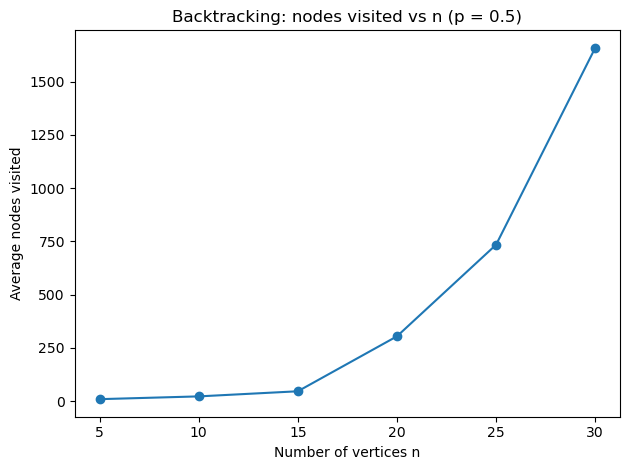

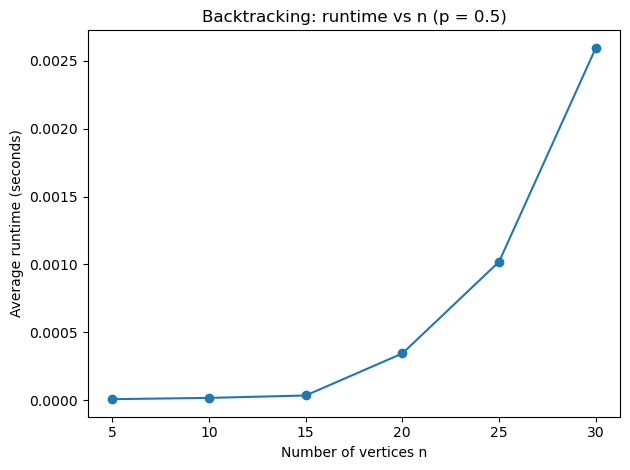

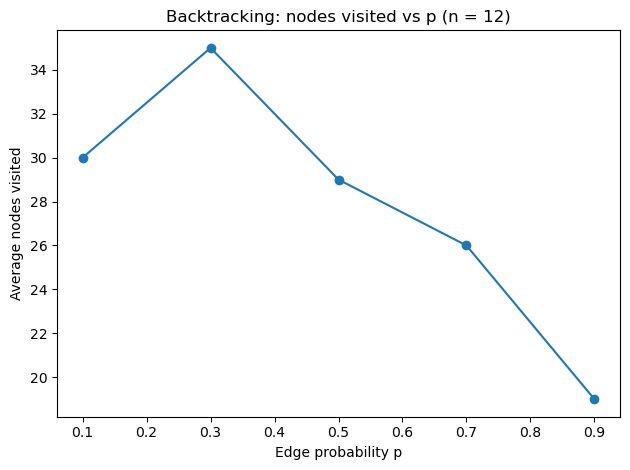

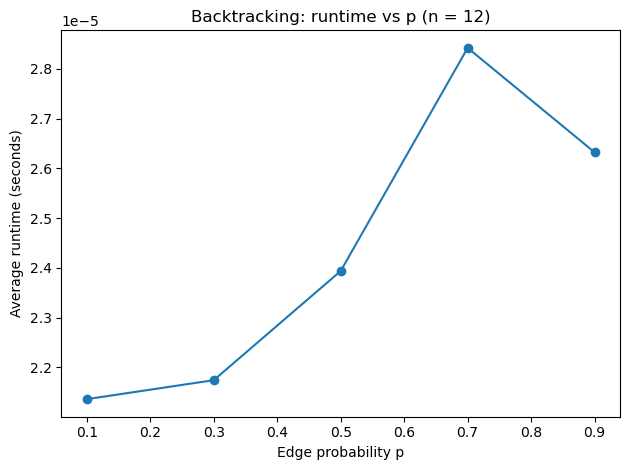

In [5]:
print("Experiment: varying n (p = 0.5)")
for r in experiment_size([5,10,15,20,25,30], p=0.5):
    print(r)

print("Experiment: varying p (n = 20)")
for r in experiment_density([0.1, 0.3, 0.5, 0.7, 0.9], n=20):
    print(r)

print("Experiment: natural order vs degree order (n = 20, p = 0.3)")
nat, deg = experiment_ordering(n=20, p=0.3)
print("Natural order:", nat)
print("Degree order:", deg)

plot_experiments()
print("Plots saved as PNG files in the current directory.")